# Проект анализа данных разрабатываемой стретегии взаимодействия с клиентами сети фитнес-центров "Культурист-датасаентист"

Основные задачи проекта:
1) прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
2) сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
3) проанализировать основные признаки, наиболее сильно влияющие на отток;
4) сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
5) выделить целевые группы клиентов;
6) предложить меры по снижению оттока;
7) определить другие особенности взаимодействия с клиентами.

## Шаг 1. Загрузите данные

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual
import warnings
warnings.filterwarnings('ignore')

<font color="green">✔️ Комментарий ревьювера     
Верно -  весь импорт библиотек в начале проекта</font>

In [2]:
fit = pd.read_csv('/datasets/gym_churn.csv')

# отображу колонки табл., округлю до сотых, задам нужный формат визуализаций
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set(rc={'figure.figsize':(16,9)})

In [3]:
# проверю общую информацию
def display_df_info(fit):
    
    display(fit.info())
    display(fit.describe())
    display(fit.isna().sum())
    display(fit.duplicated().sum())
    display(fit.head(10))
display_df_info(fit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

None

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,"4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00","4,000.00"
mean,0.51,0.85,0.49,0.31,0.90,4.68,0.41,29.18,146.94,4.32,3.72,1.88,1.77,0.27
std,0.50,0.36,0.50,0.46,0.30,4.55,0.49,3.26,96.36,4.19,3.75,0.97,1.05,0.44
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,18.00,0.15,1.00,0.00,0.00,0.00,0.00
25%,0.00,1.00,0.00,0.00,1.00,1.00,0.00,27.00,68.87,1.00,1.00,1.18,0.96,0.00
50%,1.00,1.00,0.00,0.00,1.00,1.00,0.00,29.00,136.22,1.00,3.00,1.83,1.72,0.00
75%,1.00,1.00,1.00,1.00,1.00,6.00,1.00,31.00,210.95,6.00,5.00,2.54,2.51,1.00
max,1.00,1.00,1.00,1.00,1.00,12.00,1.00,41.00,552.59,12.00,31.00,6.02,6.15,1.00


gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

0

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.23,5.00,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12.00,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1.00,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12.00,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1.00,3,1.11,1.12,0
5,1,1,0,0,1,1,1,34,450.74,1.00,3,2.62,2.64,0
6,1,1,1,1,0,6,1,32,94.27,6.00,2,1.14,1.28,0
7,0,1,0,0,1,1,0,30,217.79,1.00,0,1.21,1.05,1
8,1,1,1,1,1,1,1,23,45.41,1.00,1,1.11,1.06,0
9,0,1,0,0,1,1,0,31,65.31,1.00,11,1.81,1.95,0


In [4]:
fit.columns=fit.columns.str.lower()
fit.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

<div class="alert alert-info"> <b>Коментарии студента V_2 :</b> Спасибо за рекомендацию, буду применять ее в новых проектах.
    Пройдемся по названиям:'gender' - пол, 'near_location' - проживание или работа в районе, где находится фитнес-центр, 'partner' - сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента),'promo_friends'-факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента), 'phone' - наличие контактного телефона, 'contract_period' - длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год), 'group_visits' - факт посещения групповых занятий, 'age' - возраст, 'avg_additional_charges_total'- суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон, 'month_to_end_contract' - срок до окончания текущего действующего абонемента (в месяцах), 'lifetime' - время с момента первого обращения в фитнес-центр (в месяцах), 'avg_class_frequency_total' - средняя частота посещений в неделю за все время с начала действия абонемента, 'avg_class_frequency_current_month' - средняя частота посещений в неделю за предыдущий месяц, 'churn'- факт оттока в текущем месяце

In [5]:
fit['month_to_end_contract'].value_counts()

1.00     2207
6.00      645
12.00     524
11.00     181
5.00      130
10.00      82
9.00       73
4.00       58
8.00       38
7.00       25
3.00       23
2.00       14
Name: month_to_end_contract, dtype: int64

In [6]:
#переведу в целочисленный
fit.month_to_end_contract = fit.month_to_end_contract.astype(np.int64)

<div class="alert alert-info"> <b>Вывод:</b> Данные готовы. Пропуски, дубликаты, аномалии в данных - отсутсвуют. Название колонок приведено к нижнему регистру.month_to_end_contract приведено к целочисленному типу. 
 </div>


## Шаг 2. Проведите исследовательский анализ данных (EDA)

### Посмотрите на датасет: есть ли в нем отсутствующие признаки, изучите средние значения и стандартные отклонения 

In [7]:
fit.describe().T.sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
avg_additional_charges_total,"4,000.00",146.94,96.36,0.15,68.87,136.22,210.95,552.59
age,"4,000.00",29.18,3.26,18.00,27.00,29.00,31.00,41.00
contract_period,"4,000.00",4.68,4.55,1.00,1.00,1.00,6.00,12.00
month_to_end_contract,"4,000.00",4.32,4.19,1.00,1.00,1.00,6.00,12.00
lifetime,"4,000.00",3.72,3.75,0.00,1.00,3.00,5.00,31.00
avg_class_frequency_total,"4,000.00",1.88,0.97,0.00,1.18,1.83,2.54,6.02
avg_class_frequency_current_month,"4,000.00",1.77,1.05,0.00,0.96,1.72,2.51,6.15
phone,"4,000.00",0.90,0.30,0.00,1.00,1.00,1.00,1.00
near_location,"4,000.00",0.85,0.36,0.00,1.00,1.00,1.00,1.00
gender,"4,000.00",0.51,0.50,0.00,0.00,1.00,1.00,1.00


<div class="alert alert-info"> <b>Комментарий студента:</b> 1) Посетителей 4000 2) Выручка допуслуг в среднем 147 макс в районе 550 3) возраст средний 29 лет макс 41 4) абонемент в среднем 5 месяцев 5) в среднем посещают 2 раза в неделю 6) половина приходит заниматься по партнерским программам , треть приходит по программе друга,групповы занятия посещает немного меньше половины, свои номера тефонов оставляют практически все 7) приходят в основном изза близости фитнес центра 8) женщин и мужчин практически одинаково 9) отток 27 % .
 </div>


In [8]:
display(fit.duplicated().sum())

0

<div class="alert alert-info"> <b>Коментарии студента V_2 :</b> Проверил дубликаты, 0 дубикатов

### Посмотрите на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался

In [9]:
fit.groupby('churn').agg('mean')

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.51,0.87,0.53,0.35,0.90,5.75,0.46,29.98,158.45,5.28,4.71,2.02,2.03
1,0.51,0.77,0.36,0.18,0.90,1.73,0.27,26.99,115.08,1.66,0.99,1.47,1.04


In [10]:
fit.groupby('churn')['gender'].agg('count')

churn
0    2939
1    1061
Name: gender, dtype: int64

<div class="alert alert-info"> <b>Коментарии студента V_2 :</b> 1061 посетителей ушло , 2939 осталось

### Постройте столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

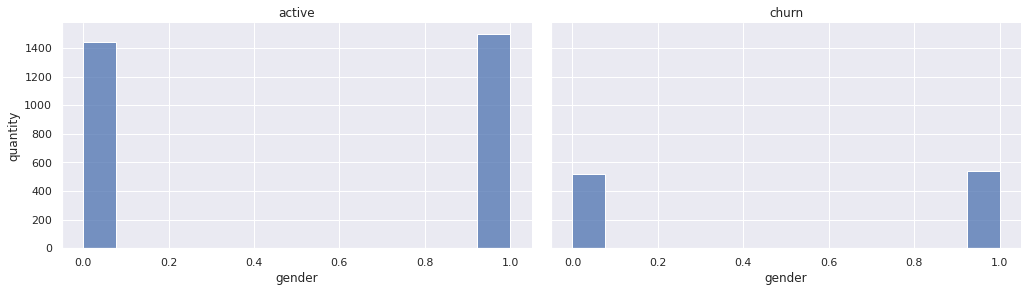

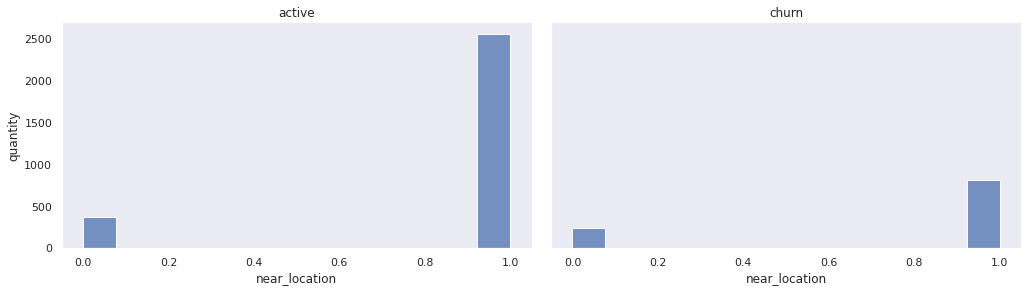

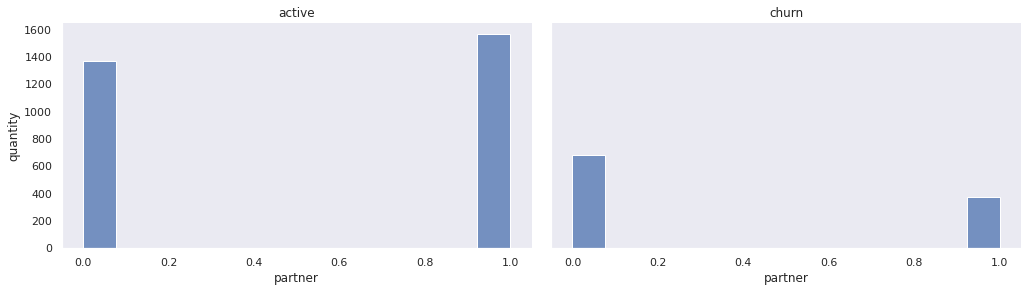

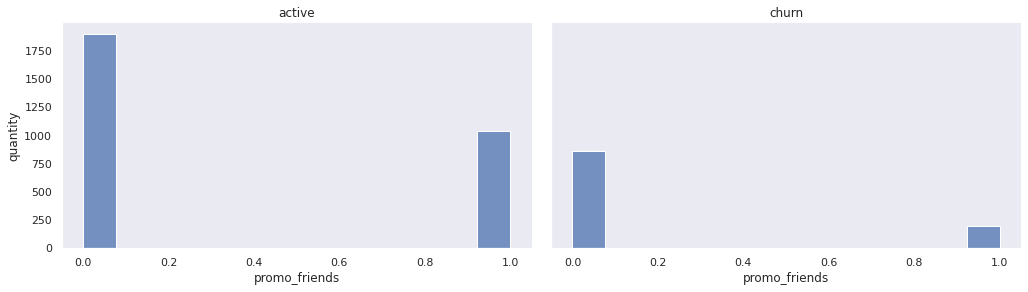

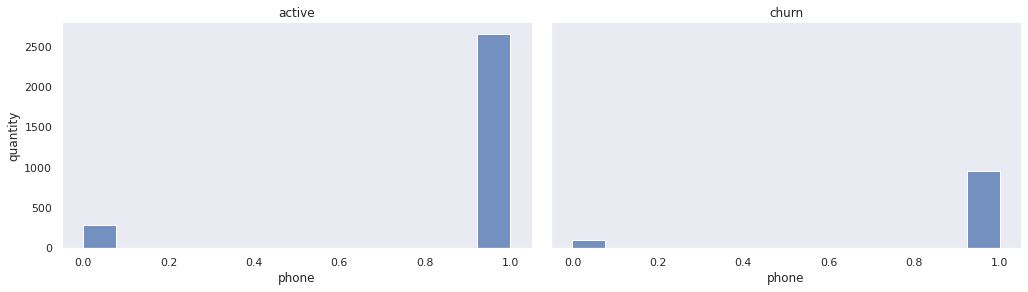

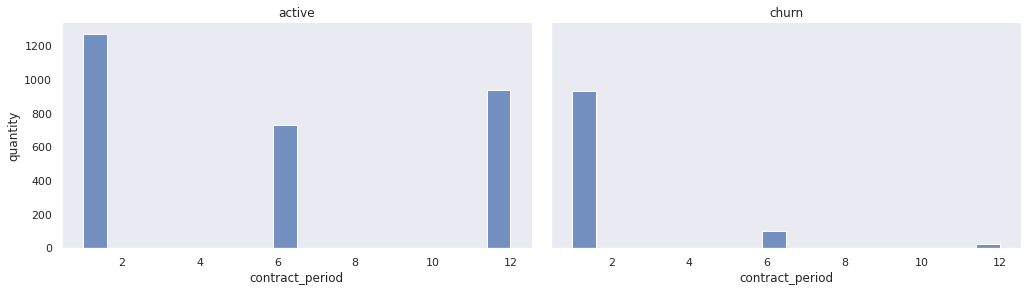

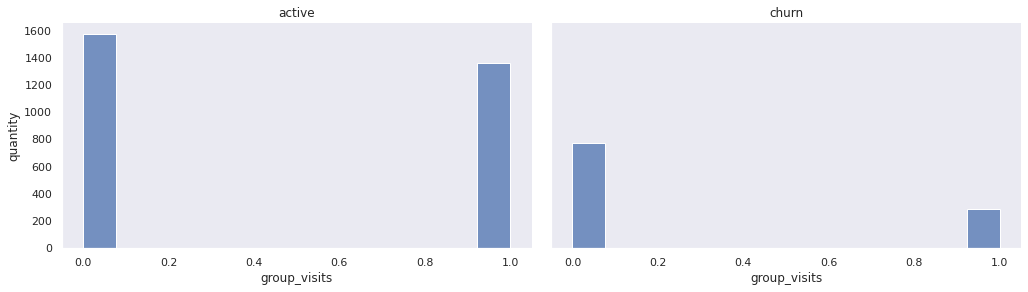

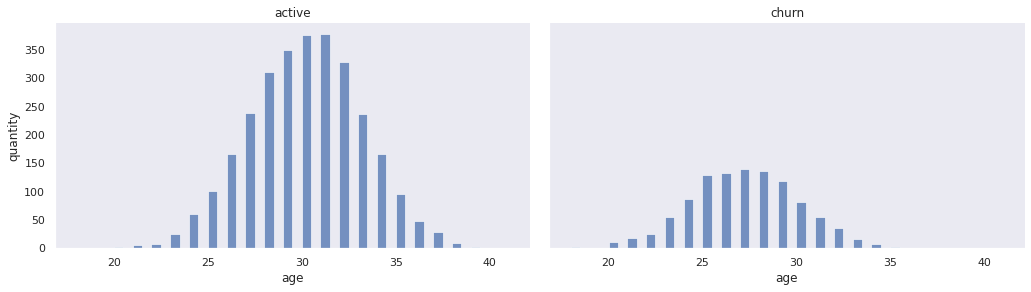

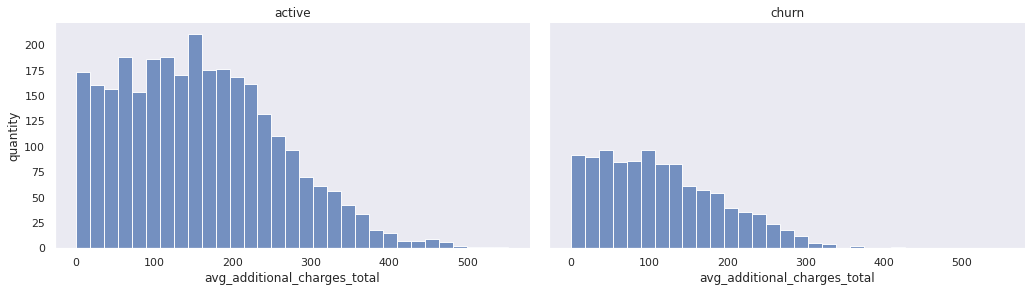

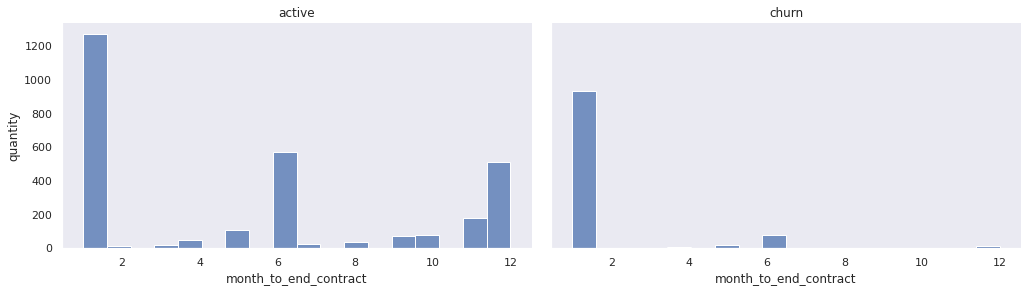

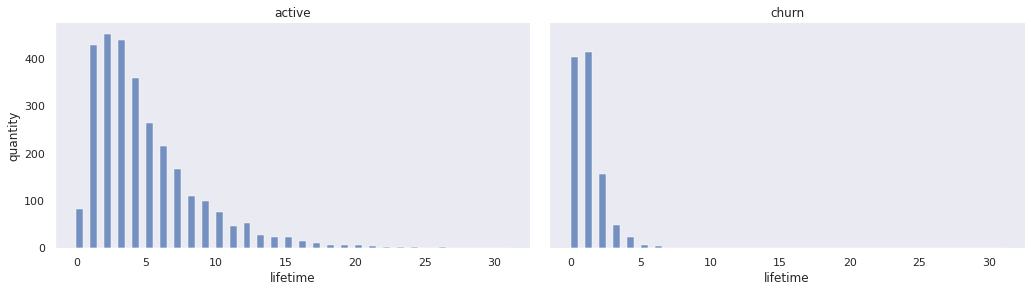

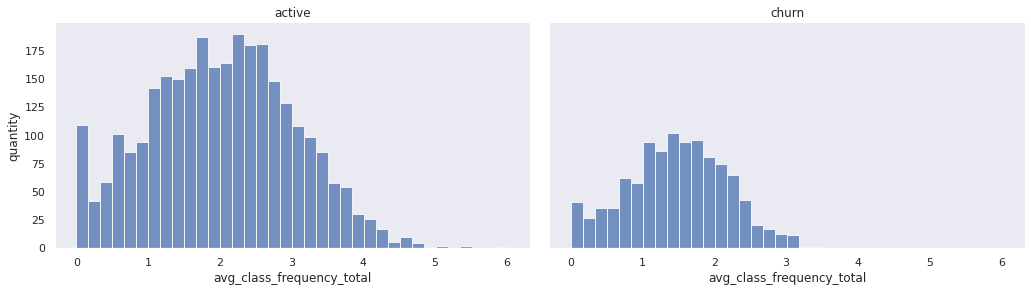

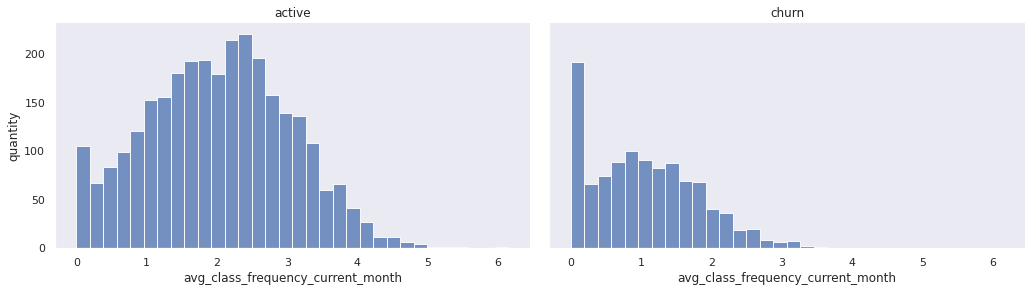

In [11]:
#построю графики
P=fit.drop(columns='churn')
fit_graph=fit.copy()
fit_graph['churn'] = fit_graph['churn'].replace([1,0],['churn','active'])
for name in P.columns:
  g=sns.displot(data=fit_graph, x=name, col="churn", palette="tab10")
  sns.set_style(style='dark')
  g.fig.set_figwidth(15)
  g.fig.set_figheight(4)
  g.set_axis_labels(name, "quantity")
  g.set_titles("{col_name}");
  plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> 
 отток - 1061 человек, осталось 2939, в основном уходят те кто посещают в среднем 1 раз в неделю и покупают абонемент не больше месяца, отток у мужчин и женщин одинаков, ушебдшие реже посещают групповые занятия 27 %, траты в фитнесцентре в диапазоне от 0 до 150 у.е. и далее снижение трат, близость к центру не является причиной остаться, если распределить продолжительность абонементов то в основной массе 1-2 месяца и дальше спад.  </div>

<div class="alert alert-info"> <b>Коментарии студента V_2 :</b> Спасибо за рекомендацию , учту в следующих проектах

### Постройте матрицу корреляций и отобразите её

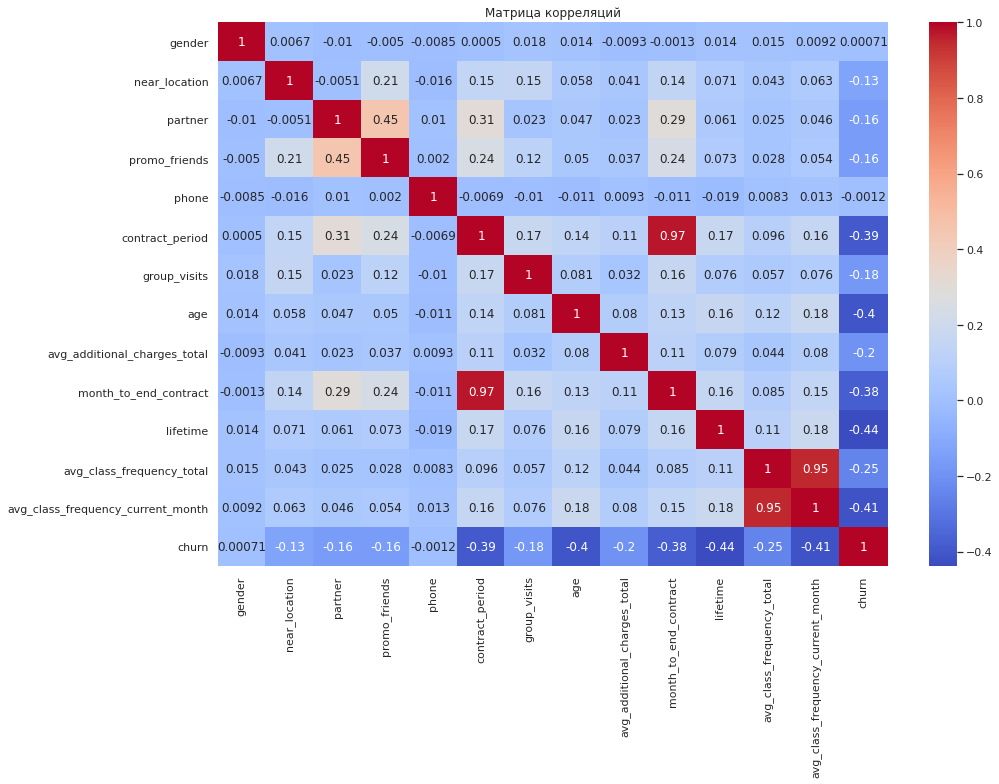

In [12]:
# выведу матрицу корреляций
mtr_corr = fit.corr() 
fig, ax = plt.subplots(figsize=(15,10))
plt.title('Матрица корреляций')

# и тепловую карту
ax = sns.heatmap(mtr_corr, cmap="coolwarm", annot=True)
plt.show()

<div class="alert alert-info"> <b>Выводы:</b>  avg_class_frequency_total - avg_class_frequency_current_month и contract_period - month_to_end_contract = мультиколлинеарны и являются дублирующими признаками удалим, что бы не было искажений. А так видно, что в отток в основном попадают более молодые клиенты(средний возраст по клиентам посещаемым 29 лет), лица которые не пользуются групповыми занятиями, которые берет абонементы на месяц, которые редко ходят в фитнес центр, которым не предлагают скидки по партнерским программам.  </div>


In [13]:
# удаляю мультиколлинеарность
fit = fit.drop(columns=['contract_period', 'avg_class_frequency_current_month'])

## Шаг 3. Постройте модель прогнозирования оттока клиентов

### Разбейте данные на обучающую и валидационную выборку

In [14]:
# разбиваю: на признаки , на целевую аудиторию
X = fit.drop('churn', axis = 1)
y = fit['churn']

In [15]:
# разбиваю: обучающие, валидационные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
#стандартизирую данные
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

### Обучите модель на train-выборке двумя способами: логистической регрессией, случайным лесом.

In [17]:
# задаю алгоритмы для логистической регрессии и случайного леса
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0)
]

# задам функцию принимающую модели и выводящую метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

### Оцените метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравните по ним модели. Какая модель показала себя лучше на основании метрик?

In [18]:
# делаю прогнозы

for i in models:
    print(i)
    make_prediction(
        m=i,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test
    )

LogisticRegression(random_state=0)
Accuracy:0.88 Precision:0.75 Recall:0.74
RandomForestClassifier(random_state=0)
Accuracy:0.90 Precision:0.80 Recall:0.77


<div class="alert alert-info"> <b>Вывод:</b> В случае данного рассчета себя хорошо показал Случайный лес, доля правильных ответов оставила на 2% больше логистической регрессии, точность лучше на 5 % чем у логистической регресии, полнота лучше на 3 процента логистической регрессии. Это значит что случайный лес показал себя лучше.  
 </div>


## Шаг 4. Сделайте кластеризацию клиентов

### Стандартизируйте данные

In [19]:
# стандартихирую данные
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Постройте матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. Внимание: отрисовка дендрограммы может занять время! На основании полученного графика предположите, какое количество кластеров можно выделить.

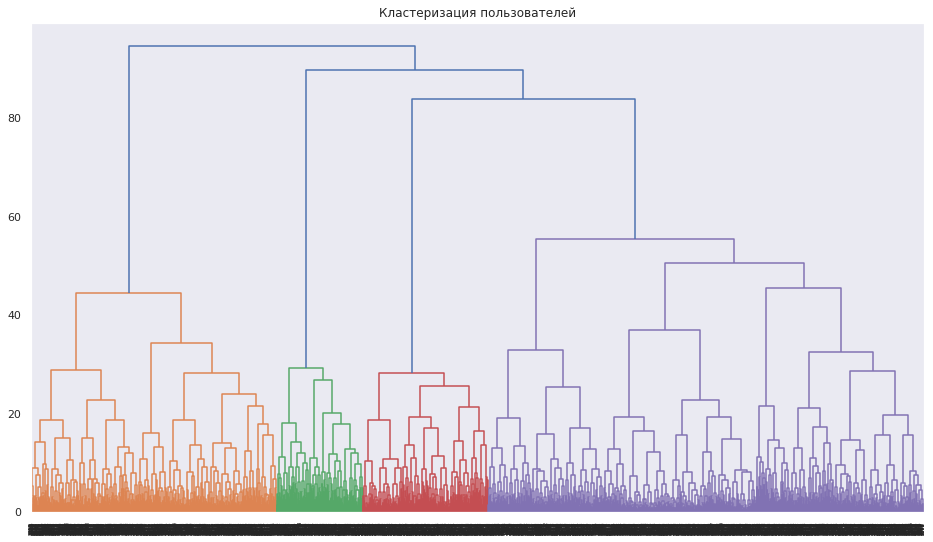

In [20]:
#строю матрицу и рисую дендрограмму
wink = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(16, 9))  
dendrogram(wink, orientation = 'top')
plt.title('Кластеризация пользователей')
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> по графику выделяем для KMeans 5 класстеров</div>


### Обучите модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов.

In [21]:
km = KMeans(n_clusters = 5, random_state=0) # задам пять класстеров
labels = km.fit_predict(X_sc) # и сформирую вектор 

### Посмотрите на средние значения признаков для кластеров. Можно ли сразу что-то заметить?

In [22]:
fit['claster'] = labels

In [23]:
fit.groupby('claster').mean().T

claster,0,1,2,3,4
gender,0.50,0.50,0.52,0.51,0.52
near_location,1.00,0.00,1.00,1.00,0.86
partner,0.89,0.49,0.42,0.20,0.47
promo_friends,1.00,0.08,0.01,0.05,0.31
phone,1.00,1.00,1.00,1.00,0.00
group_visits,0.52,0.23,0.55,0.30,0.43
age,29.54,28.69,30.81,27.82,29.30
avg_additional_charges_total,152.14,137.28,177.10,124.63,144.21
month_to_end_contract,6.27,2.80,6.16,1.90,4.47
lifetime,4.21,2.98,5.70,2.06,3.94


<div class="alert alert-info"> <b>Комментарий студента:</b> 
1) 0 класстер - пол поровну, локация близко к фитнесс центру, по партнерским акциям(приведи друга), телефон -ок, посещение групповых занятий на 50 %, возраст 30, доп усл. 153 у.е., абонемент 6 месяцев, 13 % оттток

2) 1 класстер - пол поровну, локация не близко к фитнесс центру, по партнерским акциям только 50 %, телефон -ок, посещение групповых занятий на 23 %, возраст 29, доп усл. 138 у.е., абонемент 3 месяцев, 40 % оттток

3) 2 класстер - пол поровну, локация близко к фитнесс центру, по партнерским акциям 42 %, телефон -ок, посещение групповых занятий на 55 %, возраст 31, доп усл. 177 у.е., абонемент 6 месяцев, 2 % оттток

4) 3 класстер - пол поровну, локация близко к фитнесс центру, по партнерским акциям 20 %, телефон -ок, посещение групповых занятий на 30 %, возраст 28, доп усл. 125 у.е., абонемент 2 месяцев, 51 % оттток

5) 4 класстер - пол поровну, локация практически близко всем к фитнесс центру, по партнерским акциям 47 %(приведи друга-треть), телефон -ок, посещение групповых занятий на 43 %, возраст 30, доп усл. 144 у.е., абонемент 4 месяцев, 27 % оттток


Согласно таблице можно сделать вывод что, самые надежные класстеры 2, 0. 3,1 - являются класстерами с большим оттоком</div>


### Постройте распределения признаков для кластеров. Можно ли что-то заметить по ним?

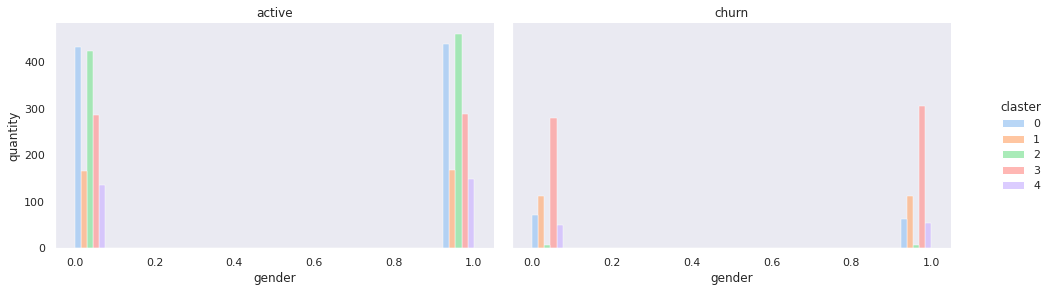

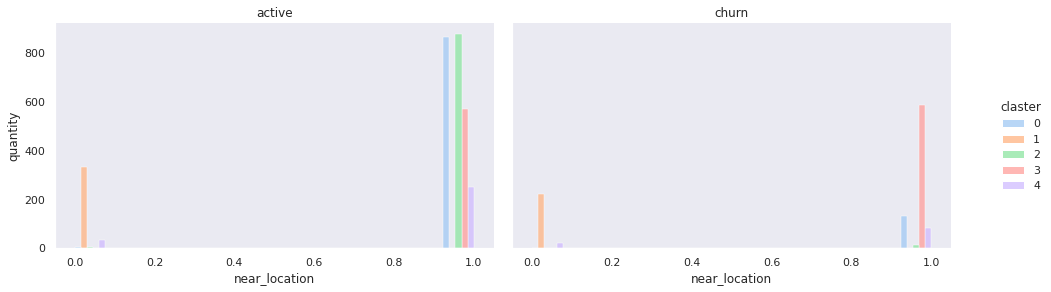

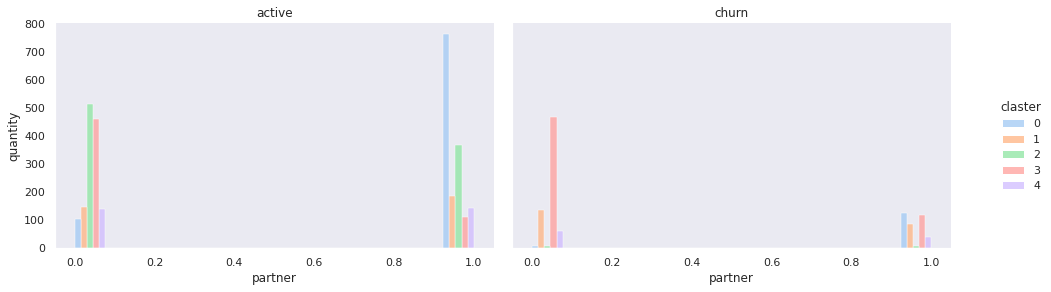

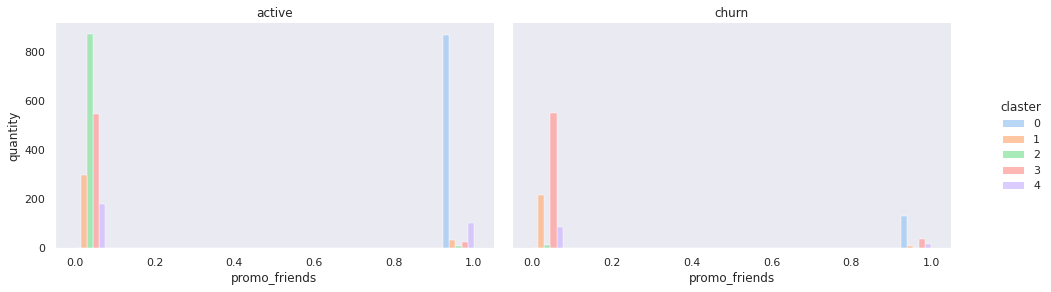

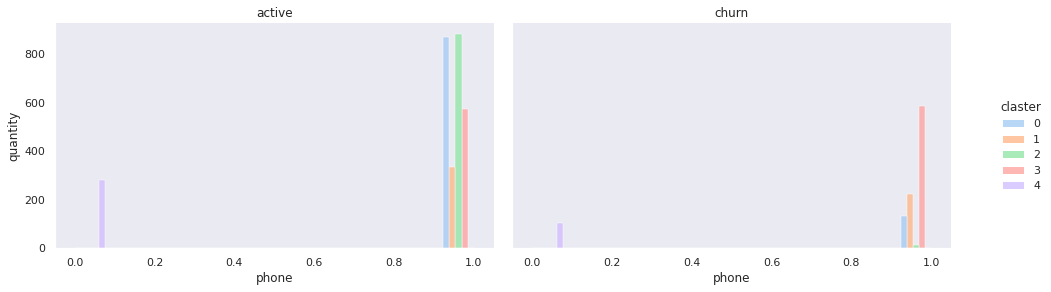

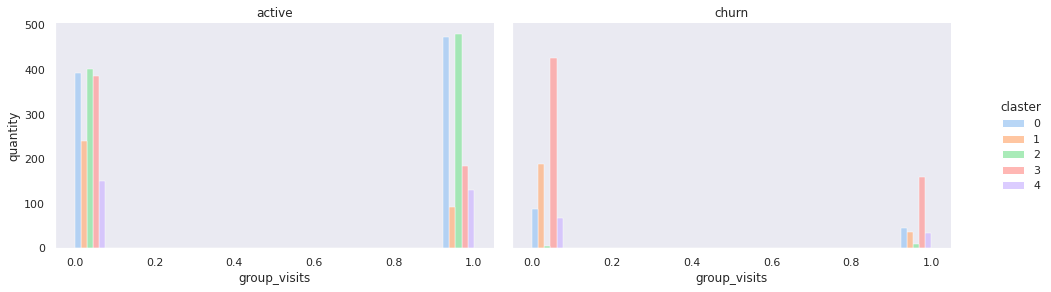

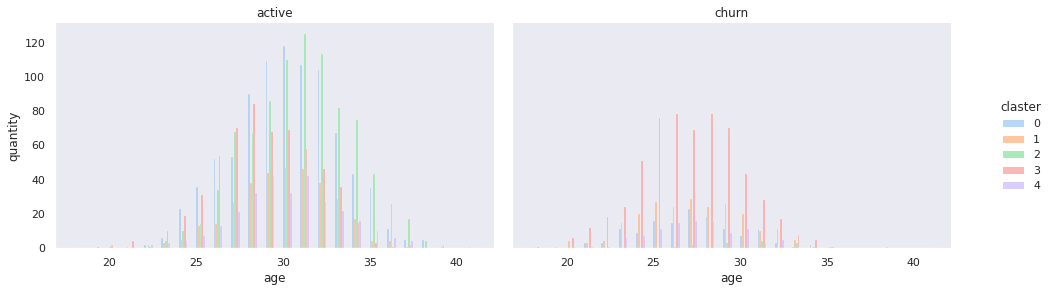

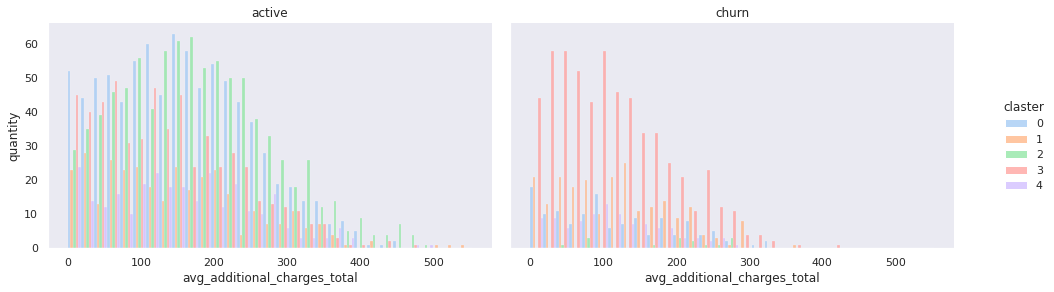

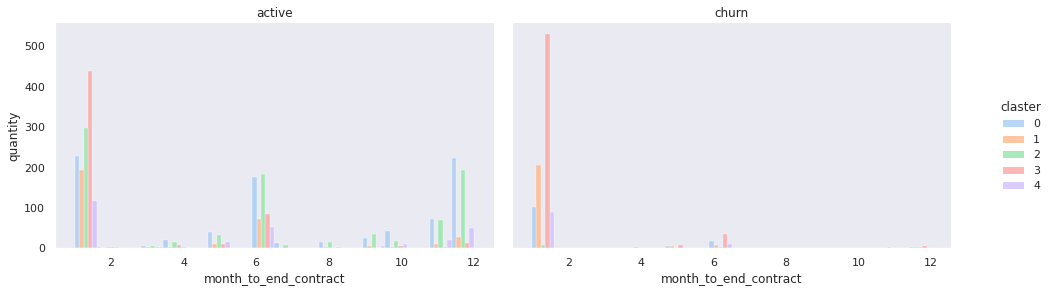

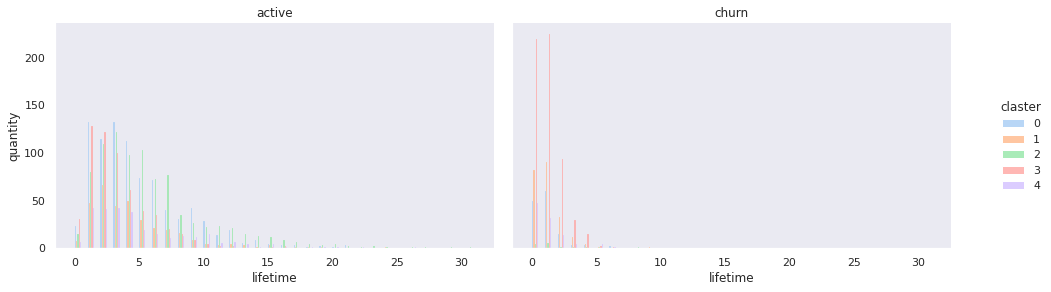

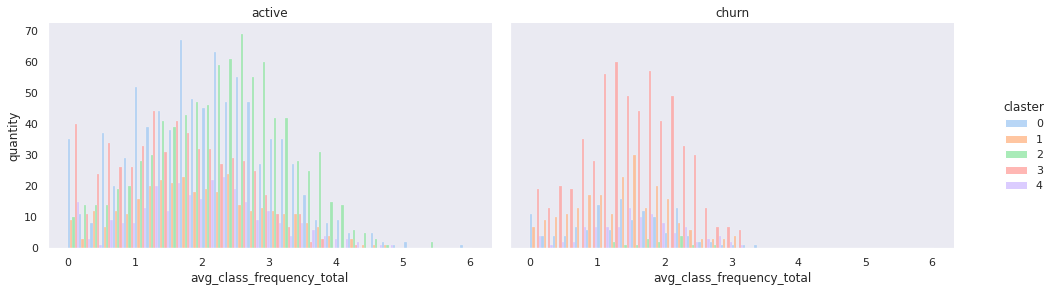

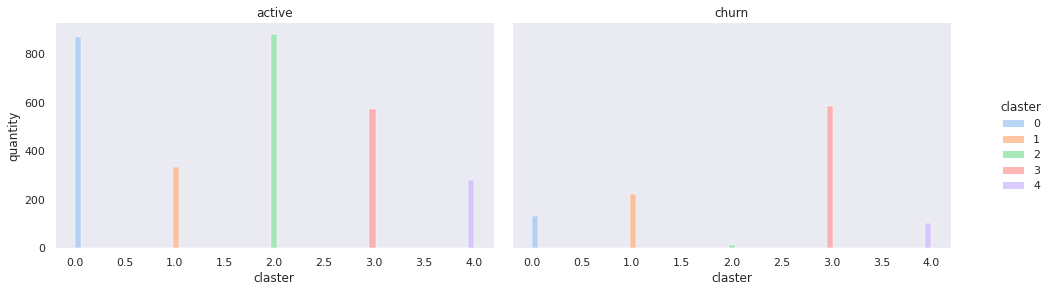

In [24]:
# строю графики

X=fit.drop(columns='churn')
fit_graph=fit.copy()
fit_graph['churn'] = fit_graph['churn'].replace([1,0],['churn','active'])
for name in X.columns:
  g = sns.displot(fit_graph, x=name, hue="claster", palette="pastel", multiple="dodge", col="churn")
  g.fig.set_figwidth(15)
  g.fig.set_figheight(4)
  g.set_axis_labels(name, "quantity")
  g.set_titles("{col_name}");
  plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> 
Отметить можно следующие:
1)Тенденция абонементов до 5 месяцев в среднем и в большем случае 1-2 месяца;
2)Дополнительные траты клиентов в фитнесс центре имеют распределяются отрицательно в отттоке на порядок ниже от действующих посетителей;
3)Групповые занятия отказываются посещать 1/3 клиентов посетителей фитнесс центра;
4)По акции друга приходят в районе 30 процентов клиентов посетителей фитнес-центра;
5)45 % посетителей не являются сотрудниками по компании-партнера;
6)Рядом с фитнесс-центров живут или работают в районе 80 процентов посетителей фитнесс-центра.
</div>


### Для каждого полученного кластера посчитайте долю оттока (методом groupby()). Отличаются ли они по доле оттока? Какие кластеры склонны к оттоку, а какие — надёжны?

In [25]:
# посчитаю долю оттока

fit.groupby('claster').agg({'churn':'mean'}).sort_values(by='churn')

,churn
claster,
2,0.02
0,0.13
4,0.27
1,0.40
3,0.51


<div class="alert alert-info"> <b>Комментарий студента:</b> Кластер 3 и 1 в основном в отттоке из всех представленных класстеров, 2 и 0 класстеры с лояльными посетителями.</div>

##  Шаг 5. Сформулируйте выводы и сделайте базовые рекомендации по работе с клиентами

Был проведен анализ данных разрабатываемой стретегии взаимодействия с клиентами сети фитнес-центров "Культурист-датасаентист"
Выводы: Было выявлено следующие:
    1) Портрет среднестатистического посетителя который может стать потенциальным долгосрочным и лояльным клиентом фитнесс центра. Женщина/Мужчина 29- 30 лет, живет по лизости от фитнес-центра, пользуется групповыми занятиями, имеет друзей таких же клиентов фитнесс-центра, имеет скидки/бонусы по программам фитнесс центра. Имеет клиент абонемент на 6+ месяцев.
    2) В проекте выявили 5 класстеров среди посетителей/клиентов фитнесс центра. Они были поделены, класстеры отличаются друг от друга уровнями посещений, отток, по прибылности итд. 
    3)В проекте так же было отмечено , что если клиент приобретает абонемент на месячный срок, не заинтересован в групповых занятиях, если клиенту не предоставляют возможность поучаствывать в специальных акциях (компания-партнер, приведи друга) то клиент потенциальная единица на отток

Рекомендации:
1) Удержания новых клиентов - развитие промо акций и спец.программ(пример-групповые занятия) для новых клиентов для заинтересованности новых клиентов, введение дополнительных товаров и услуг с более высоким спросом, акции для новых клиентов в приеобретении абонементов на более длительный срок 6+ месяцев
2)Разобраться с оттоком в кластерах 3 и 1, улучшить показатели и уменьшить отток, выстроить систему аналитики, что бы анализировать уровень оттока не после а до.
3) Мотивация и поддержка лидерских класстеров - проводить так же данную работу.